In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import math
import random

In [2]:
def phi(x, r):
    return r * x * (1 - x)

def get_window(r):
    return ((r - 1) / (2 * r), (r + 1) / (2 * r))

In [3]:
def simple_iterations(epsilon, r):
    (left_border, right_border) = get_window(r)
    iterations = 0
    
    cur_x = random.uniform(left_border, right_border)
    next_x = phi(cur_x, r) 
    
    while (abs(cur_x - next_x) > epsilon):
        cur_x = next_x
        next_x = phi(cur_x, r)
        iterations += 1
        if (iterations > 1000):
            return (-100, 1000)
        
    return (next_x, iterations)

In [4]:
roots = []
roots.append(0)
roots.append(0)

for i in range(1, 10**4):
    cur_r = random.uniform(0.01, 0.99)
    (answer, iters) = simple_iterations(1e-8, cur_r)
    x1 = 0.0
    x2 = 1 - (1 / cur_r)
    if (answer > -50):
        if (abs(answer - x1) < abs(answer - x2) and abs(answer - x1) < 1e-6):
            roots[0] += 1
        elif (abs(answer - x2) < 1e-6):
            roots[1] += 1
print(roots)

[9999, 0]


In [5]:
roots = []
roots.append(0)
roots.append(0)

undefined_roots = []

for i in range(1, 10**4):
    cur_r = random.uniform(1.01, 2.99)
    (answer, iters) = simple_iterations(1e-8, cur_r)
    x1 = 0.0
    x2 = 1 - (1 / cur_r)
    if (answer > -50):
        if (abs(answer - x1) < abs(answer - x2) and abs(answer - x1) < 1e-6):
            roots[0] += 1
        elif (abs(answer - x2) < 1e-6):
            roots[1] += 1
    else:
        undefined_roots.append(cur_r)
print(roots) 
print(undefined_roots)

[0, 9981]
[2.9874997776172334, 2.986868055392039, 2.9893437559691254, 2.9893726412813777, 2.986746668973331, 2.984894101359414, 2.988366974446718, 2.9863894829904876, 2.9884641535508987, 2.9865691090568887, 2.986773260973222, 2.9845421989897045, 2.9853053593907646, 2.9850782374871443, 2.9884666031601332, 2.9893561178868486, 2.989428854746456, 2.986477813888733]


In [6]:
count = 0

for i in range(1, 10**4):
    cur_r = random.uniform(3.01, 10.0)
    (answer, iters) = simple_iterations(1e-8, cur_r)
    if (answer < -50):
        count += 1
print(count)

9999


x = r * x * (1 - x)

phi(x) = r * x * (1 - x)

phi'(x) = r - 2rx

чтобы решение сходилось к корню, первое приближение должно лежать в окрестности корня, удовлетворяющей условию

|phi'(x)| <= 1

|phi'(x)| <= 1 => (r - 1) / (2 * r) < x < (r + 1) / (2 * r)

0 лежит в области O = ( (r - 1) / (2 * r) ; (r + 1) / (2 * r) ) при 0 < r < 1. 
1 - 1/r лежит в области O при 1 < r < 3. 

Заметим, что области сходимости к 0 (0; 1) и к 1-1/r (1; 3) не пересекаются

In [7]:
def simple_iterations_with_dir_detection(epsilon, r):
    (left_border, right_border) = get_window(r)
    points = []
    
    dir_changed = 0
    dir_saved = 0
        
    cur_x = random.uniform(left_border, right_border)
    next_x = phi(cur_x, r) 
    points.append(cur_x)
    points.append(next_x)
    iterations = 2
    
    while (abs(cur_x - next_x) > epsilon):
        cur_x = next_x
        next_x = phi(cur_x, r)
        points.append(next_x)
        iterations += 1
        if (iterations > 1000):
            return (-100, -100, -100)
        
    if (abs(next_x) > 1e-6 and abs(next_x - (1 - 1/r)) > 1e-6):
        return (-100, -100, next_x)
    root = next_x
    for i in range (0, len(points) - 1):
        cur_point = points[i]
        next_point = points[i + 1]
        d = (cur_point - root) * (next_point - root)
        if d > 0:
            dir_saved += 1
        elif d < 0:
            dir_changed += 1
            
    return (dir_saved, dir_changed, root)

In [8]:
total_dir_saves = 0
total_dir_changes = 0

errors = []

for i in range(1, 10**4):
    cur_r = random.uniform(0.01, 0.99)
    (dir_saved, dir_changed, answer) = simple_iterations_with_dir_detection(1e-8, cur_r)
    if (abs(answer) < 1e-6):
        total_dir_saves += dir_saved
        total_dir_changes += dir_changed
    else:
        errors.append((cur_r, answer))

print(total_dir_saves, total_dir_changes)
print(errors)

542619 2518
[]


In [9]:
total_dir_saves = 0
total_dir_changes = 0

errors = []

for i in range(1, 10**4):
    cur_r = random.uniform(1.01, 1.99)
    (dir_saved, dir_changed, answer) = simple_iterations_with_dir_detection(1e-8, cur_r)
    if (abs(answer - (1 - 1 / cur_r)) < 1e-6):
        total_dir_saves += dir_saved
        total_dir_changes += dir_changed
    else:
        errors.append((cur_r, answer))

print(total_dir_saves, total_dir_changes)
print(errors)

502536 2619
[]


In [10]:
total_dir_saves = 0
total_dir_changes = 0

errors = []

for i in range(1, 10**4):
    cur_r = random.uniform(2.01, 2.99)
    (dir_saved, dir_changed, answer) = simple_iterations_with_dir_detection(1e-8, cur_r)
    if (abs(answer - (1 - 1 / cur_r)) < 1e-6):
        total_dir_saves += dir_saved
        total_dir_changes += dir_changed
    else:
                errors.append((cur_r, answer))

print(total_dir_saves, total_dir_changes)
print(errors)

3295 567975
[(2.9882817356234823, -100), (2.988983816824101, -100), (2.9891913480917824, -100), (2.9871824314449316, -100), (2.985605924101958, -100), (2.9877397227727904, -100), (2.9874693344704917, -100), (2.989594556055967, -100), (2.987433900699979, -100), (2.985039809299281, -100), (2.988043677364682, -100), (2.9896161114361273, -100), (2.9864634559992904, -100), (2.9845732609901647, -100), (2.985939659008306, -100), (2.9887659816525796, -100), (2.9893150522732066, -100), (2.9894715543204518, -100), (2.98539605199503, -100), (2.9851307461041308, -100), (2.9857472930563294, -100), (2.9881366710962234, -100), (2.987083347320151, -100), (2.98698733789474, -100), (2.9880564433704415, -100), (2.989538261654209, -100), (2.987298605304665, -100), (2.9851225218854425, -100), (2.986160106080935, -100), (2.9898424583611014, -100), (2.9890695048908973, -100), (2.9854713010671645, -100), (2.987180255356491, -100), (2.9871223913829428, -100), (2.9876645538088025, -100), (2.988828105554384, -10

При 0 < r < 1 сходится в точку x0 = 0.

phi'(x0) = r => 0 < phi' < 1 => монотонная сходимость

При 1 < r < 2 сходится в точку x1 = 1 - 1/r

phi'(x1) = 2 - r => 0 < phi' < 1 => монотонная сходимость

При 2 < r < 3 сходится в точку x1 = 1 - 1/r

phi'(x1) = 2 - r => -1 < phi' < 0 => колебательная сходимость

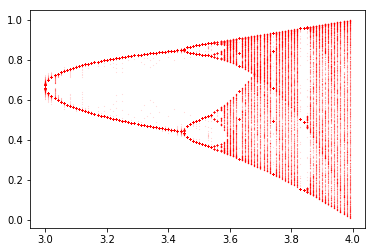

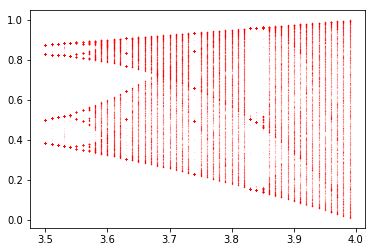

In [11]:
def show_bifurcation():
    x_vals = []
    r_vals = []

    r = 3.0
    for j in range(100):
        (left_border, right_border) = get_window(r)
        cur_x = random.uniform(left_border, right_border)
        for i in range(1000):
            cur_x = r * cur_x * (1 - cur_x)
            x_vals.append(cur_x)
            r_vals.append(r)
        r += 0.01

    plt.plot(r_vals, x_vals, 'r.', ms=0.1)
    plt.show()

show_bifurcation()

def show_chaos():
    x_vals = []
    r_vals = []

    r = 3.5
    for j in range(50):
        (left_border, right_border) = get_window(r)
        cur_x = random.uniform(left_border, right_border)
        for i in range(1000):
            cur_x = r * cur_x * (1 - cur_x)
            x_vals.append(cur_x)
            r_vals.append(r)
        r += 0.01

    plt.plot(r_vals, x_vals, 'r.', ms=0.1)
    plt.show()

show_chaos()